#### IMPORTS

In [1]:
import torch
import numpy as np
import os
#system oath /home/karansingh/Documents/summer-term/ECG_ML/MAIN

#sys.path.append('/home/karansingh/Documents/summer-term/ECG_ML/MAIN')
import sys
sys.path.append('/home/karansingh/Documents/summer-term/ECG_ML/MAIN')
from dataloader import MyCustomDataset
from torch.utils.data import DataLoader

import torch.nn as nn
import torch.optim as optim


from model_cnn import  SmallCNN
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


In [2]:
default_dir = os.getcwd()
def default_directory():
    os.chdir(f"{default_dir}")
    print(f"you are back to the default directory: {default_dir}")


In [3]:
default_directory()
os.getcwd()

you are back to the default directory: /home/karansingh/Documents/summer term/ECG_ML/MAIN


'/home/karansingh/Documents/summer term/ECG_ML/MAIN'

In [4]:
os.chdir("ML/Data_cheb_typ2")
os.getcwd()

'/home/karansingh/Documents/summer term/ECG_ML/MAIN/ML/Data_cheb_typ2'

In [5]:
import re
import glob
import shutil

def fix_txt_files(pattern="disease_*_cheb_*.txt"):
    """
    Fix corrupted .txt files caused by invalid float formatting.

    Handles:
    - 'e/' → 'e-'
    - 'e,' → 'e+'
    - leading '=' signs before numbers

    Makes a backup of the original file with '_curr.txt' suffix.
    Prints a summary of all fixes.
    """
    file_report = {}
    total_corrupt_numbers = 0
    total_corrupt_files = 0

    for path in glob.glob(pattern):
        with open(path, "r") as f:
            content = f.read()

        # Detect corrupt patterns
        bad_e_slash = len(re.findall(r"e/", content))
        bad_e_comma = len(re.findall(r"e,", content))
        bad_equal = len(re.findall(r"=(\d)", content))
        corrupt_count = bad_e_slash + bad_e_comma + bad_equal

        if corrupt_count > 0:
            total_corrupt_files += 1
            total_corrupt_numbers += corrupt_count

            # Backup original
            backup_path = path.replace(".txt", "_curr.txt")
            shutil.copy2(path, backup_path)

            # Fix content
            fixed = content.replace("e/", "e-")
            fixed = fixed.replace("e,", "e+")
            fixed = re.sub(r"=(\d)", r"\1", fixed)  # remove leading '=' before digits

            # Overwrite original file
            with open(path, "w") as f:
                f.write(fixed)

            file_report[path] = corrupt_count
            print(f"Fixed {path} (corrupt numbers: {corrupt_count}, backup -> {backup_path})")

    # Summary
    print("\n=== Repair Summary ===")
    if total_corrupt_files == 0:
        print("No corrupted files found.")
    else:
        print(f"Total corrupted files fixed: {total_corrupt_files}")
        print(f"Total corrupt numbers fixed: {total_corrupt_numbers}")
        for fname, count in file_report.items():
            print(f"  {fname}: {count} fixes")

# Run the repair
fix_txt_files("disease_*_cheb_*.txt")



=== Repair Summary ===
No corrupted files found.


#### LOAD DATA

In [6]:
import re
import glob
import shutil

def fix_txt_files(pattern="*.txt"):
    file_report = {}
    total_corrupt = 0
    total_files = 0

    for path in glob.glob(pattern):
        with open(path, "r", errors="replace") as f:
            content = f.read()

        # Count corrupt patterns
        bad_e_slash = len(re.findall(r"e/", content))
        bad_e_comma = len(re.findall(r"e,", content))
        bad_equals  = len(re.findall(r"=[0-9]", content))  # '=' directly before number
        corrupt_count = bad_e_slash + bad_e_comma + bad_equals

        if corrupt_count > 0:
            total_files += 1
            total_corrupt += corrupt_count

            # Backup original
            backup_path = path.replace(".txt", "_curr.txt")
            shutil.copy2(path, backup_path)

            # Fix contents
            fixed = content.replace("e/", "e-").replace("e,", "e+")
            fixed = re.sub(r"=([0-9])", r"\1", fixed)  # remove '=' before digits

            # Write corrected file (overwrite original)
            with open(path, "w") as f:
                f.write(fixed)

            file_report[path] = corrupt_count
            print(f"Fixed {path} (found {corrupt_count} corrupt entries, backup -> {backup_path})")

    print("\n=== Repair Summary ===")
    if total_files == 0:
        print("No corrupted files found")
    else:
        print(f"Total corrupted files: {total_files}")
        print(f"Total corrupt entries fixed: {total_corrupt}")
        for fname, count in file_report.items():
            print(f"  {fname}: {count} fixes")


# Run in current folder
fix_txt_files("disease_*_cheb_*.txt")



=== Repair Summary ===
No corrupted files found


In [7]:



data_ST_list = []
for i in range(10):
    cc = np.loadtxt('disease_ST_cheb_'+str(i)+'.txt')
    data_ST_list.append(cc)
    print(f"data st of length {len(cc)} in {i} index loaded")


data_ST_list = np.array(data_ST_list)
images = np.resize(data_ST_list,(5000,10000))

labels=np.zeros(5000)

data_SB_list = []
for i in range(10):
    cc = np.loadtxt('disease_SB_cheb_'+str(i)+'.txt')
    data_SB_list.append(cc)
    print(f"data sb of length {len(cc)} in {i} index loaded")
images = np.concatenate((images,np.resize(data_SB_list,(5000,10000))))
labels=np.concatenate((labels,np.ones(5000)))

data_SR_list = []
for i in range(10):
    cc = np.loadtxt('disease_SR_cheb_'+str(i)+'.txt')
    data_SR_list.append(cc)
    print(f"data sr of length {len(cc)} in {i} index loaded")
images = np.concatenate((images,np.resize(data_SR_list,(5000,10000))))
labels=np.concatenate((labels,np.ones(5000)*2))
                    

data st of length 500 in 0 index loaded
data st of length 500 in 1 index loaded
data st of length 500 in 2 index loaded
data st of length 500 in 3 index loaded
data st of length 500 in 4 index loaded
data st of length 500 in 5 index loaded
data st of length 500 in 6 index loaded
data st of length 500 in 7 index loaded
data st of length 500 in 8 index loaded
data st of length 500 in 9 index loaded
data sb of length 500 in 0 index loaded
data sb of length 500 in 1 index loaded
data sb of length 500 in 2 index loaded
data sb of length 500 in 3 index loaded
data sb of length 500 in 4 index loaded
data sb of length 500 in 5 index loaded
data sb of length 500 in 6 index loaded
data sb of length 500 in 7 index loaded
data sb of length 500 in 8 index loaded
data sb of length 500 in 9 index loaded
data sr of length 500 in 0 index loaded
data sr of length 500 in 1 index loaded
data sr of length 500 in 2 index loaded
data sr of length 500 in 3 index loaded
data sr of length 500 in 4 index loaded


In [8]:
images.min(), images.max(), images.mean(), images.std()


(np.float64(-0.5491812981988458),
 np.float64(0.5904544233144864),
 np.float64(-6.953252788359047e-20),
 np.float64(0.029920312513903032))

In [9]:
default_directory()
print(len(images),len(labels))
from model_cnn import SmallCNN
print(images.shape)
images = images.reshape(15000,1,100,100)
images.shape



you are back to the default directory: /home/karansingh/Documents/summer term/ECG_ML/MAIN
15000 15000
(15000, 10000)


(15000, 1, 100, 100)

#### CREATE BATCHES

In [10]:
# Create an instance of your dataset

images_train, images_test, labels_train, labels_test = train_test_split(images, labels, test_size=0.2, random_state=42)
train_dataset = MyCustomDataset(images_train, labels_train)
test_dataset = MyCustomDataset(images_test, labels_test)
# Define a DataLoader
train_dataloader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=32, shuffle=False)

#### TRAINING PARAMETERS

In [11]:
torch.manual_seed(37)  # Set seed for reproducibility
model__ = SmallCNN()

criterion = nn.CrossEntropyLoss()  # Cross-entropy loss for classification
optimizer = optim.Adam(model__.parameters(), lr=0.001)  # Adam optimizer
def accuracy(y_true, y_pred):
    """Calculates accuracy between truth labels and predictions.

    Args:
        y_true (torch.Tensor): Truth labels for predictions.
        y_pred (torch.Tensor): Predictions to be compared to predictions.

    Returns:
        [torch.float]: Accuracy value between y_true and y_pred, e.g. 78.45
    """
    correct = torch.eq(y_true, y_pred).sum().item()
    acc = (correct / len(y_pred)) * 100
    return acc


#### TRAINING

In [12]:
default_directory()


you are back to the default directory: /home/karansingh/Documents/summer term/ECG_ML/MAIN


In [13]:
default_directory()
test_losses_list=[]
torch.manual_seed(42)  # Set seed for reproducibility
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

model__ = SmallCNN().to(device)

with torch.no_grad():
    model__.eval()
    test_loss, accuracy_test = 0.0, 0.0
    for i, (images, labels) in enumerate(test_dataloader):
        images, labels = images.to(device), labels.to(device)  # Move data to GPU
        outputs = model__(images)
        loss = criterion(outputs, labels)
        test_loss += loss.item()
        accuracy_test += accuracy(labels, outputs.argmax(dim=1))
test_losses_list.append(test_loss / len(test_dataloader))

print(accuracy_test / len(test_dataloader))

you are back to the default directory: /home/karansingh/Documents/summer term/ECG_ML/MAIN
32.33599290780142


In [14]:
torch.manual_seed(42)  # Set seed for reproducibility
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

model__ = SmallCNN().to(device)

criterion = nn.CrossEntropyLoss()  # Cross-entropy loss for classification
optimizer = torch.optim.SGD(model__.parameters(), lr=0.001, weight_decay=1e-4)
#adam
# optimizer = optim.Adam(model__.parameters(), lr=0.000001,weight_decay=1e-4)  # Adam optimizer

def accuracy(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item()
    acc = (correct / len(y_pred)) * 100
    return acc

num_epochs = 20
test_losses_list = []
train_losses_list = []
accuracy_train_list = []
accuracy_test_list = []

for epoch in range(num_epochs):
    model__.train()
    running_loss, accuracy_train = 0.0, 0.0
    for i, (images, labels) in enumerate(train_dataloader):
        images, labels = images.to(device), labels.to(device)  # Move data to GPU
        outputs = model__(images)
        loss = criterion(outputs, labels)
        
        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        accuracy_train += accuracy(labels, outputs.argmax(dim=1))
    train_losses_list.append(running_loss / len(train_dataloader))
    
    # Just calculating the test loss and accuracy
    with torch.no_grad():
        model__.eval()
        test_loss, accuracy_test = 0.0, 0.0
        for i, (images, labels) in enumerate(test_dataloader):
            images, labels = images.to(device), labels.to(device)  # Move data to GPU
            outputs = model__(images)
            loss = criterion(outputs, labels)
            test_loss += loss.item()
            accuracy_test += accuracy(labels, outputs.argmax(dim=1))
    test_losses_list.append(test_loss / len(test_dataloader))
    
    accuracy_train_list.append(accuracy_train / len(train_dataloader))
    accuracy_test_list.append(accuracy_test / len(test_dataloader))

    print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {running_loss / len(train_dataloader):.4f}, Test Loss: {test_loss / len(test_dataloader):.4f}, Train Accuracy: {accuracy_train / len(train_dataloader):.4f}, Test Accuracy: {accuracy_test / len(test_dataloader):.4f}')

Epoch [1/20], Train Loss: 0.8020, Test Loss: 0.4826, Train Accuracy: 63.5917, Test Accuracy: 80.9176
Epoch [2/20], Train Loss: 0.4375, Test Loss: 0.2859, Train Accuracy: 83.7167, Test Accuracy: 90.1485
Epoch [3/20], Train Loss: 0.3023, Test Loss: 0.2262, Train Accuracy: 89.3833, Test Accuracy: 91.8772
Epoch [4/20], Train Loss: 0.2402, Test Loss: 0.1869, Train Accuracy: 91.6833, Test Accuracy: 93.3400
Epoch [5/20], Train Loss: 0.2101, Test Loss: 0.1666, Train Accuracy: 92.8667, Test Accuracy: 94.1157
Epoch [6/20], Train Loss: 0.1948, Test Loss: 0.1579, Train Accuracy: 93.5500, Test Accuracy: 94.7695
Epoch [7/20], Train Loss: 0.1811, Test Loss: 0.1625, Train Accuracy: 93.9500, Test Accuracy: 93.8830
Epoch [8/20], Train Loss: 0.1719, Test Loss: 0.1442, Train Accuracy: 94.1333, Test Accuracy: 94.8471
Epoch [9/20], Train Loss: 0.1678, Test Loss: 0.1411, Train Accuracy: 94.3333, Test Accuracy: 95.1130
Epoch [10/20], Train Loss: 0.1537, Test Loss: 0.1367, Train Accuracy: 94.9667, Test Accurac

In [15]:
import copy
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
""" training for seeds 20-50 taking max accuracy model
"""
# === CONFIG ===
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
num_epochs, patience = 25, 7
seeds = range(20, 50)   # from 20 to 50

# To store results for all seeds
all_train_losses, all_test_losses = {}, {}
all_train_acc, all_test_acc = {}, {}

best_acc_overall, best_seed, best_model_state = 0, None, None

def correct(pred, true): 
    return (pred == true).sum().item()

# === LOOP OVER SEEDS ===
for seed in seeds:
    torch.manual_seed(seed)

    # Model, optimizer, scheduler
    model = SmallCNN().to(device)
    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=5e-4, weight_decay=1e-4)
    scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(
        optimizer, mode="min", factor=0.5, patience=3
    )

    # Logs for this run
    train_losses_list, test_losses_list = [], []
    accuracy_train_list, accuracy_test_list = [], []

    best_acc, wait, best_model = 0, 0, None

    for epoch in range(num_epochs):
        # --- Train ---
        model.train(); run_loss = 0; c_train = t_train = 0
        for x, y in train_dataloader:
            x, y = x.to(device), y.to(device)
            out = model(x); loss = criterion(out, y)
            optimizer.zero_grad(); loss.backward(); optimizer.step()
            run_loss += loss.item()
            c_train += correct(out.argmax(1), y); t_train += y.size(0)
        train_losses_list.append(run_loss/len(train_dataloader))
        accuracy_train_list.append(100*c_train/t_train)

        # --- Test ---
        model.eval(); run_loss = 0; c_test = t_test = 0
        with torch.no_grad():
            for x, y in test_dataloader:
                x, y = x.to(device), y.to(device)
                out = model(x); loss = criterion(out, y)
                run_loss += loss.item()
                c_test += correct(out.argmax(1), y); t_test += y.size(0)
        test_losses_list.append(run_loss/len(test_dataloader))
        accuracy_test_list.append(100*c_test/t_test)

        # --- LR schedule ---
        scheduler.step(test_losses_list[-1])

        # --- Early stopping ---
        if accuracy_test_list[-1] > best_acc:
            best_acc, wait = accuracy_test_list[-1], 0
            best_model = copy.deepcopy(model.state_dict())
            if best_acc > 98.6:
                print(f"Seed {seed}: Early stopping at epoch {epoch+1}")
                break
        else:
            wait += 1
            if wait >= patience:
                print(f"Seed {seed}: Early stopping at epoch {epoch+1}")
                break

    # Save results for this seed
    all_train_losses[seed] = train_losses_list
    all_test_losses[seed] = test_losses_list
    all_train_acc[seed] = accuracy_train_list
    all_test_acc[seed] = accuracy_test_list

    # Check if this seed gave the best accuracy overall
    if best_acc > best_acc_overall:
        best_acc_overall, best_seed = best_acc, seed
        best_model_state = best_model

    print(f"Seed {seed}: Best Test Accuracy = {best_acc:.2f}")

# === Save best model ===
torch.save(best_model_state, f"best_model_seed_{best_seed}.pth")
print(f"\nBest overall seed = {best_seed}, Accuracy = {best_acc_overall:.2f}")


Seed 20: Early stopping at epoch 16
Seed 20: Best Test Accuracy = 96.90
Seed 21: Early stopping at epoch 10
Seed 21: Best Test Accuracy = 96.63
Seed 22: Early stopping at epoch 17
Seed 22: Best Test Accuracy = 96.93
Seed 23: Early stopping at epoch 21
Seed 23: Best Test Accuracy = 96.83
Seed 24: Early stopping at epoch 12
Seed 24: Best Test Accuracy = 96.40
Seed 25: Best Test Accuracy = 96.83
Seed 26: Early stopping at epoch 17
Seed 26: Best Test Accuracy = 97.00
Seed 27: Early stopping at epoch 13
Seed 27: Best Test Accuracy = 96.33
Seed 28: Early stopping at epoch 15
Seed 28: Best Test Accuracy = 96.93
Seed 29: Early stopping at epoch 15
Seed 29: Best Test Accuracy = 96.70
Seed 30: Early stopping at epoch 21
Seed 30: Best Test Accuracy = 97.20
Seed 31: Early stopping at epoch 21
Seed 31: Best Test Accuracy = 97.00
Seed 32: Early stopping at epoch 23
Seed 32: Best Test Accuracy = 97.20
Seed 33: Early stopping at epoch 15
Seed 33: Best Test Accuracy = 97.03
Seed 34: Early stopping at e

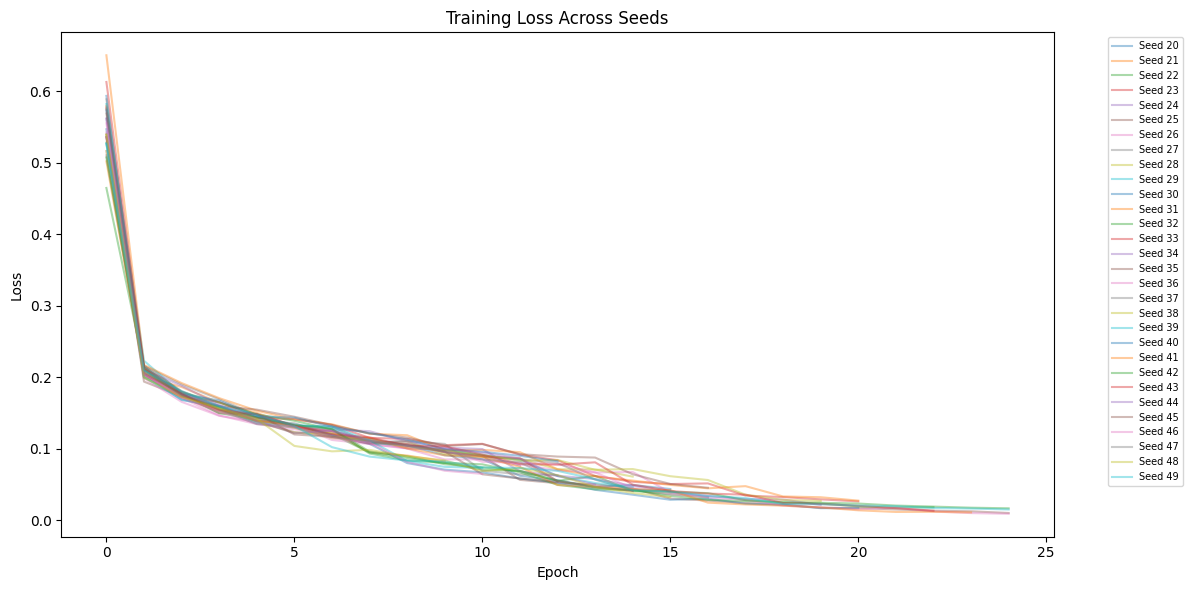

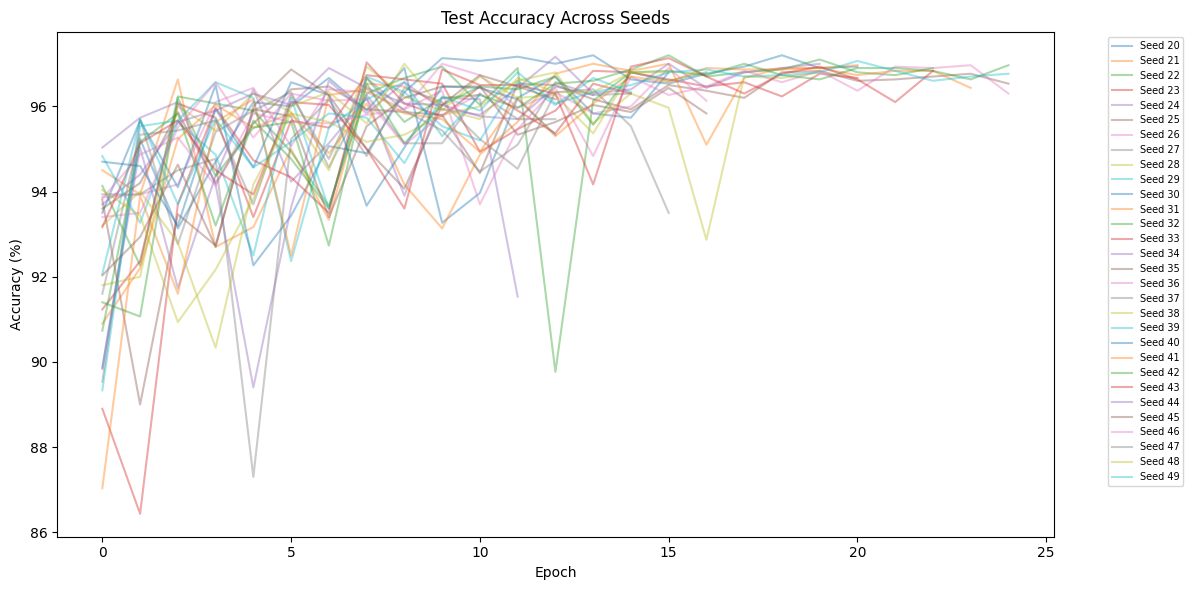

In [16]:
# --- Plot Training Loss for all seeds ---
plt.figure(figsize=(12,6))
for seed, losses in all_train_losses.items():
    plt.plot(losses, alpha=0.4, label=f"Seed {seed}")
plt.title("Training Loss Across Seeds")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(bbox_to_anchor=(1.05,1), loc='upper left', fontsize=7)
plt.tight_layout()
plt.show()

# --- Plot Test Accuracy for all seeds ---
plt.figure(figsize=(12,6))
for seed, acc in all_test_acc.items():
    plt.plot(acc, alpha=0.4, label=f"Seed {seed}")
plt.title("Test Accuracy Across Seeds")
plt.xlabel("Epoch")
plt.ylabel("Accuracy (%)")
plt.legend(bbox_to_anchor=(1.05,1), loc='upper left', fontsize=7)
plt.tight_layout()
plt.show()


In [17]:
import pickle
import os
import ipynbname

# Get current notebook name
try:
    # Get notebook name (without .ipynb extension)
    notebook_name = ipynbname.name()

except:
    notebook_name = "Notebook"  # fallback if can't get notebook name

# Create folder with notebook name if it doesn't exist
if not os.path.exists(notebook_name):
    os.makedirs(notebook_name)

# Path to save
save_path = os.path.join(notebook_name, "all_results.pkl")

# Save results
results = {
    "train_losses": all_train_losses,
    "test_losses": all_test_losses,
    "train_acc": all_train_acc,
    "test_acc": all_test_acc,
    "best_seed": best_seed,
    "best_acc": best_acc_overall,
}

with open(save_path, "wb") as f:
    pickle.dump(results, f)

torch.save(best_model_state, os.path.join(notebook_name, f"best_model{best_seed}.pth"))

print(f" Saved all training histories to {save_path}")


 Saved all training histories to main_cnn100_cheb_typ2/all_results.pkl


In [18]:
# === Instantiate a new model object ===
model = SmallCNN().to(device)

# === Load the best saved state dict ===
model.load_state_dict(best_model_state)

# === Set to evaluation mode ===
model.eval()

print(f"Loaded best model from seed {best_seed} with accuracy {best_acc_overall:.2f}")


Loaded best model from seed 30 with accuracy 97.20


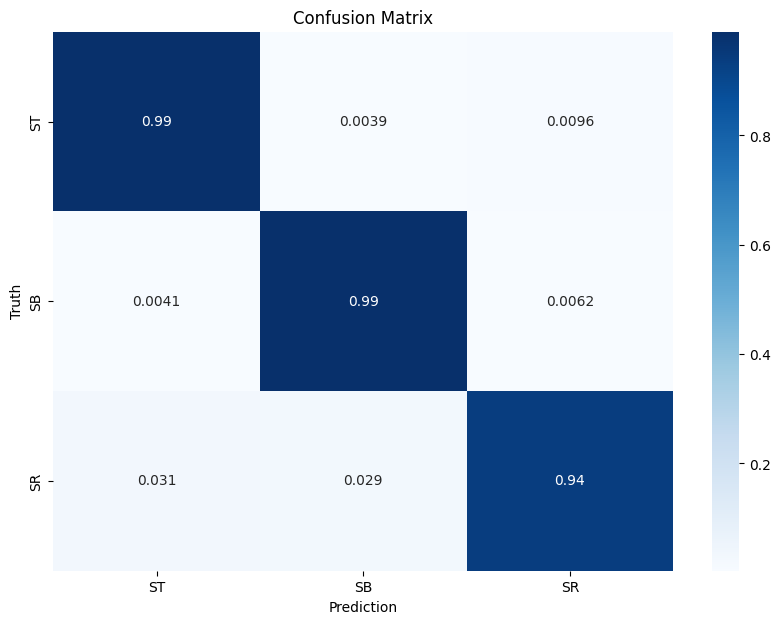

In [19]:
#confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import pandas as pd
import torch.nn.functional as F

model.eval()
y_pred = []
y_true = []
y_scores = []  # Added to collect probability scores

with torch.no_grad():
    for images, labels in test_dataloader:
        outputs = model(images.to(device))
        # Get probability scores using softmax
        probabilities = F.softmax(outputs, dim=1)
        y_scores.extend(probabilities.cpu().numpy())
        
        _, predicted = torch.max(outputs, 1)
        y_pred.extend(predicted.cpu().numpy())
        y_true.extend(labels.cpu().numpy())

# Convert to numpy arrays
y_scores = np.array(y_scores)

cm = confusion_matrix(y_true, y_pred)
cm = cm / cm.sum(axis=1)[:, np.newaxis]  # Normalize confusion matrix
df_cm = pd.DataFrame(cm, index=["ST", "SB", "SR"], columns=["ST", "SB", "SR"])
plt.figure(figsize=(10, 7))
sns.heatmap(df_cm, annot=True, cmap='Blues')
plt.xlabel('Prediction')
plt.ylabel('Truth')
plt.title('Confusion Matrix')
plt.show()

In [20]:

#Classification Report for Test Data:

from sklearn.metrics import classification_report
print(classification_report(y_true, y_pred, target_names=["ST", "SB", "SR"]))


              precision    recall  f1-score   support

          ST       0.97      0.99      0.98      1037
          SB       0.97      0.99      0.98       970
          SR       0.98      0.94      0.96       993

    accuracy                           0.97      3000
   macro avg       0.97      0.97      0.97      3000
weighted avg       0.97      0.97      0.97      3000



Average precision score, micro-averaged over all classes: 1.00


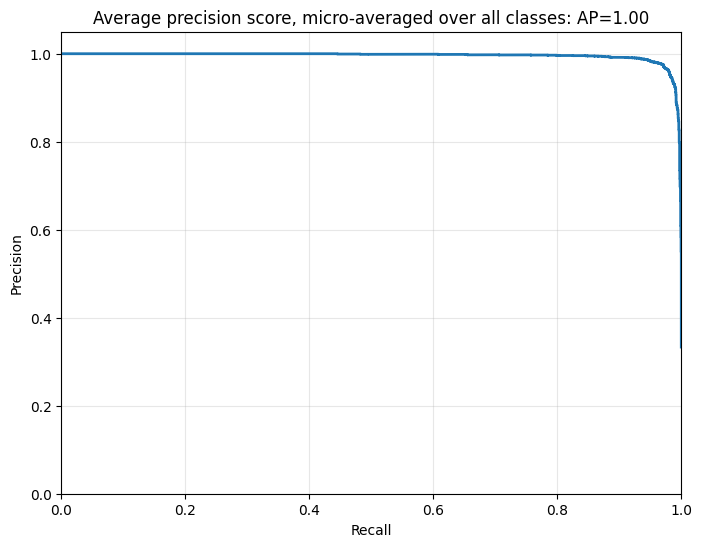

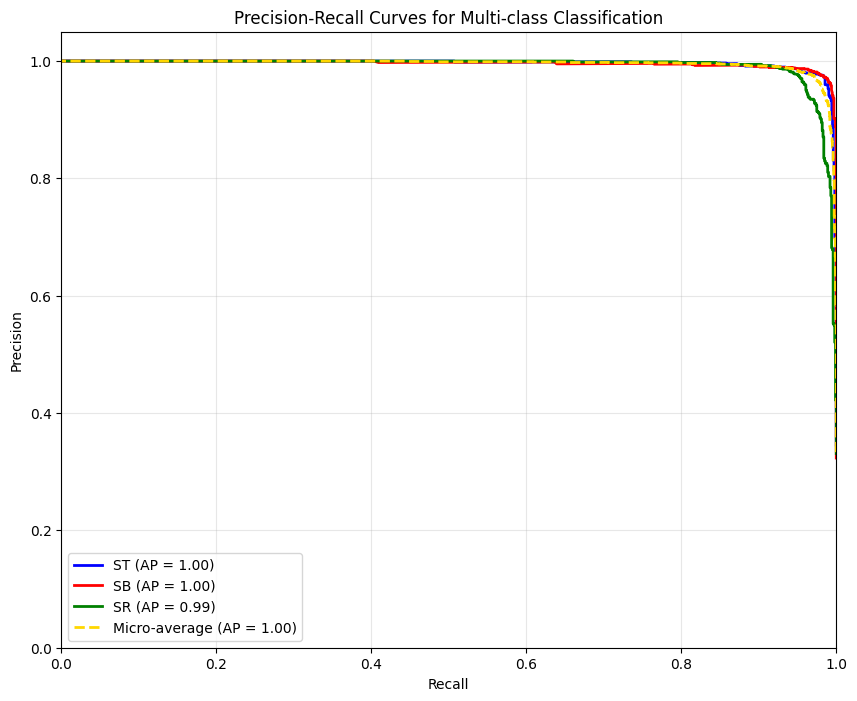

In [21]:
# Precision-Recall Curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
import matplotlib.pyplot as plt

# Compute Precision-Recall and plot curve
precision = dict()
recall = dict()
average_precision = dict()

# For each class, compute PR curve using probability scores
for i in range(3):
    precision[i], recall[i], _ = precision_recall_curve(
        (np.array(y_true) == i).astype(int),  # Binary true labels for class i
        y_scores[:, i]  # Probability scores for class i
    )
    average_precision[i] = average_precision_score(
        (np.array(y_true) == i).astype(int), 
        y_scores[:, i]
    )

# Micro-average: using probability scores
from sklearn.preprocessing import label_binarize
y_true_binary = label_binarize(y_true, classes=[0, 1, 2])

precision["micro"], recall["micro"], _ = precision_recall_curve(
    y_true_binary.ravel(),
    y_scores.ravel()
)
average_precision["micro"] = average_precision_score(
    y_true_binary, 
    y_scores,
    average="micro"
)

print('Average precision score, micro-averaged over all classes: {0:0.2f}'
        .format(average_precision["micro"]))

# Plot micro-average PR curve
plt.figure(figsize=(8, 6))
plt.step(recall['micro'], precision['micro'], where='post', linewidth=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title(
    'Average precision score, micro-averaged over all classes: AP={0:0.2f}'
    .format(average_precision["micro"]))
plt.grid(True, alpha=0.3)
plt.show()

# Plot individual class PR curves
plt.figure(figsize=(10, 8))
colors = ['blue', 'red', 'green']
class_names = ['ST', 'SB', 'SR']

for i, color, class_name in zip(range(3), colors, class_names):
    plt.plot(recall[i], precision[i], color=color, lw=2,
             label=f'{class_name} (AP = {average_precision[i]:0.2f})')

plt.plot(recall['micro'], precision['micro'], color='gold', lw=2, linestyle='--',
         label=f'Micro-average (AP = {average_precision["micro"]:0.2f})')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall Curves for Multi-class Classification')
plt.legend(loc="lower left")
plt.grid(True, alpha=0.3)
plt.show()

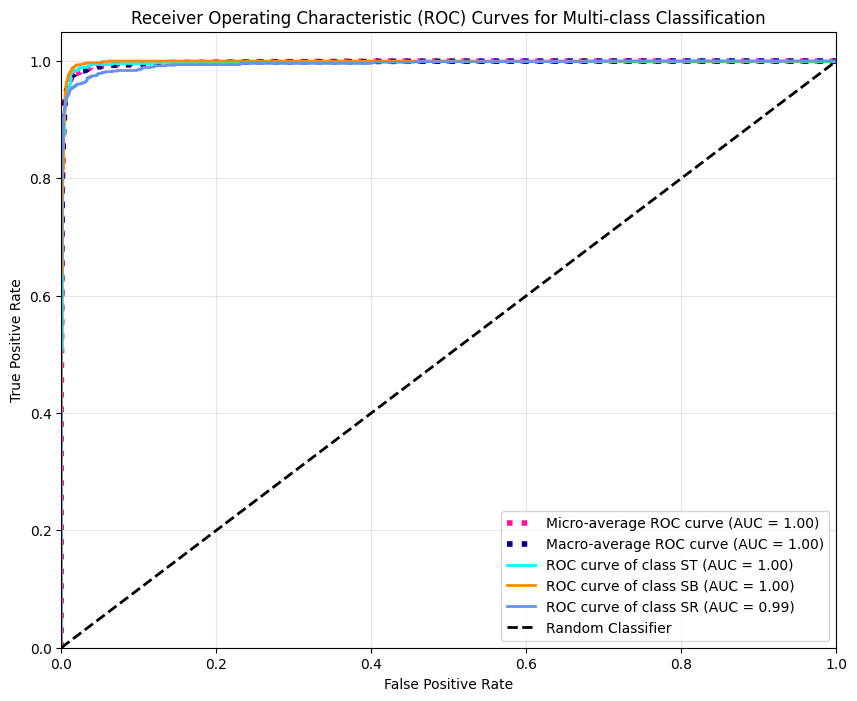

AUC Scores:
Class ST: 0.998
Class SB: 0.998
Class SR: 0.995
Micro-average: 0.997
Macro-average: 0.997


In [22]:
# ROC curve
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_auc_score

# Binarize the true labels for multi-class ROC
y_test = label_binarize(y_true, classes=[0, 1, 2])
# Use probability scores (not predictions!)
y_score = y_scores  # This contains the probability scores from softmax

n_classes = 3

fpr = dict()
tpr = dict()
roc_auc = dict()

# Compute ROC curve and ROC area for each class
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Compute macro-average ROC curve and ROC area
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at these points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure(figsize=(10, 8))

# Plot micro-average ROC curve
plt.plot(fpr["micro"], tpr["micro"],
         label='Micro-average ROC curve (AUC = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

# Plot macro-average ROC curve
plt.plot(fpr["macro"], tpr["macro"],
         label='Macro-average ROC curve (AUC = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

# Plot ROC curve for each class
colors = ['aqua', 'darkorange', 'cornflowerblue']
class_names = ['ST', 'SB', 'SR']

for i, color, class_name in zip(range(n_classes), colors, class_names):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'ROC curve of class {class_name} (AUC = {roc_auc[i]:0.2f})')

# Plot diagonal line (random classifier)
plt.plot([0, 1], [0, 1], 'k--', lw=2, label='Random Classifier')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves for Multi-class Classification')
plt.legend(loc="lower right")
plt.grid(True, alpha=0.3)
plt.show()

# Print AUC scores
print("AUC Scores:")
for i, class_name in enumerate(['ST', 'SB', 'SR']):
    print(f"Class {class_name}: {roc_auc[i]:.3f}")
print(f"Micro-average: {roc_auc['micro']:.3f}")
print(f"Macro-average: {roc_auc['macro']:.3f}")

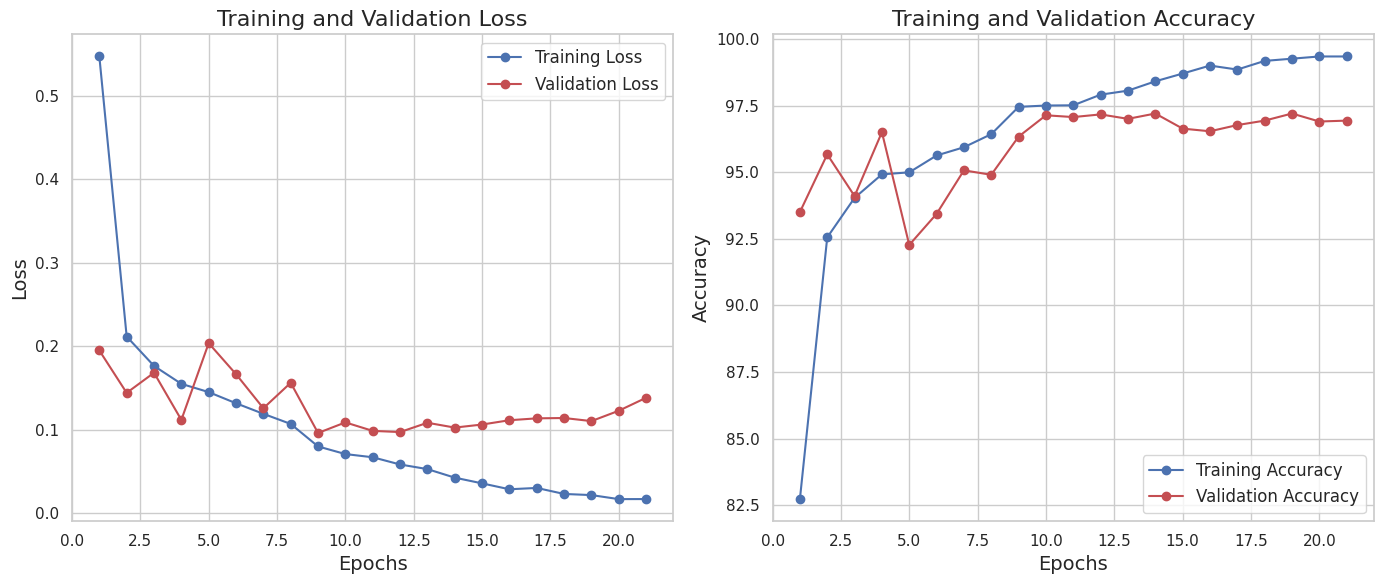

In [23]:
from plots import accuracy_and_validation_plots
epochs_= list(range(1, len(all_train_losses[best_seed])+1))
accuracy_and_validation_plots(epochs_,
    all_train_losses[best_seed],
    all_test_losses[best_seed],
    all_train_acc[best_seed],
    all_test_acc[best_seed]
).plot_figure("accuracy.png")


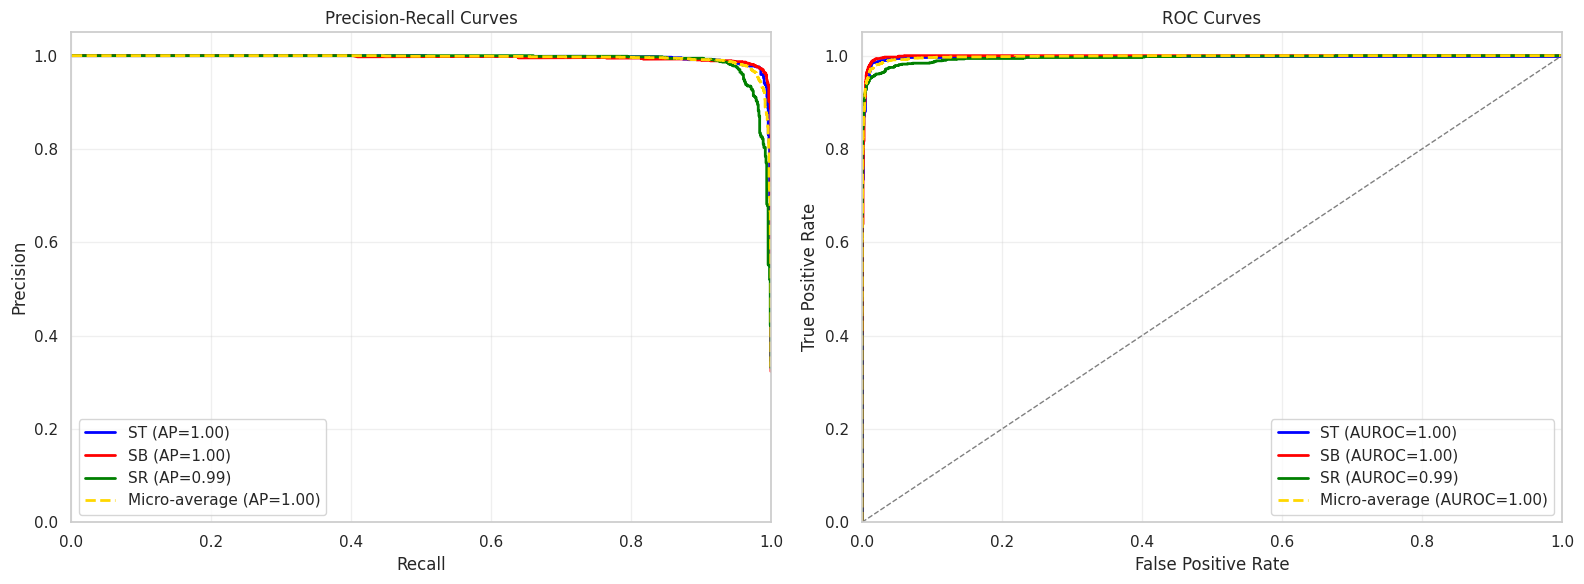

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.preprocessing import label_binarize

# Assume y_true and y_scores are already defined
classes = [0, 1, 2]
class_names = ['ST', 'SB', 'SR']
colors = ['blue', 'red', 'green']

# Binarize the labels for multi-class metrics
y_true_binary = label_binarize(y_true, classes=classes)

# ----------------------
# Precision-Recall Curves
# ----------------------
precision = dict()
recall = dict()
average_precision = dict()

for i in classes:
    precision[i], recall[i], _ = precision_recall_curve(y_true_binary[:, i], y_scores[:, i])
    average_precision[i] = average_precision_score(y_true_binary[:, i], y_scores[:, i])

# Micro-average PR
precision["micro"], recall["micro"], _ = precision_recall_curve(y_true_binary.ravel(), y_scores.ravel())
average_precision["micro"] = average_precision_score(y_true_binary, y_scores, average="micro")

# ----------------------
# ROC Curves
# ----------------------
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in classes:
    fpr[i], tpr[i], _ = roc_curve(y_true_binary[:, i], y_scores[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Micro-average ROC
fpr["micro"], tpr["micro"], _ = roc_curve(y_true_binary.ravel(), y_scores.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# ----------------------
# Plotting
# ----------------------
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot PRC
ax = axes[0]
for i, color, name in zip(classes, colors, class_names):
    ax.plot(recall[i], precision[i], color=color, lw=2, label=f'{name} (AP={average_precision[i]:0.2f})')
ax.plot(recall['micro'], precision['micro'], color='gold', lw=2, linestyle='--',
        label=f'Micro-average (AP={average_precision["micro"]:0.2f})')
ax.set_xlabel('Recall')
ax.set_ylabel('Precision')
ax.set_title('Precision-Recall Curves')
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.05])
ax.grid(True, alpha=0.3)
ax.legend(loc='lower left')

# Plot ROC
ax = axes[1]
for i, color, name in zip(classes, colors, class_names):
    ax.plot(fpr[i], tpr[i], color=color, lw=2, label=f'{name} (AUROC={roc_auc[i]:0.2f})')
ax.plot(fpr['micro'], tpr['micro'], color='gold', lw=2, linestyle='--',
        label=f'Micro-average (AUROC={roc_auc["micro"]:0.2f})')
ax.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')  # Diagonal
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('ROC Curves')
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.05])
ax.grid(True, alpha=0.3)
ax.legend(loc='lower right')

plt.tight_layout()
plt.show()
